In [246]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import math
import statistics as st




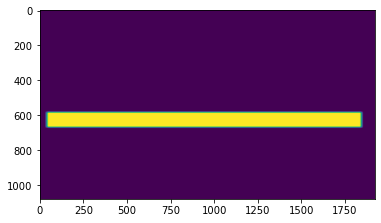

In [247]:
# マスク用単一色画像を作成
height = 100 # 生成画像の高さ
width = 100 # 生成画像の幅
imgMask = np.full((height, width, 1), 1, dtype=np.uint8)

xhosei=0
yhosei=9

# マスク範囲を四角形で描画
boxFromX = 2+xhosei #マスク範囲開始位置 X座標
boxFromY = 45+yhosei #マスク範囲開始位置 Y座標
boxToX = 95+xhosei #マスク範囲終了位置 X座標
boxToY = 52+yhosei #マスク範囲終了位置 Y座標
cv2.rectangle(imgMask, (boxFromX, boxFromY), (boxToX, boxToY),(255), cv2.FILLED)

img_resize = cv2.resize(imgMask, dsize=[1920,1080], fx=None, fy=None)

# マスク結果画像を保存
cv2.imwrite("./mask/testMaskImg.jpg", img_resize)
plt.imshow(img_resize)

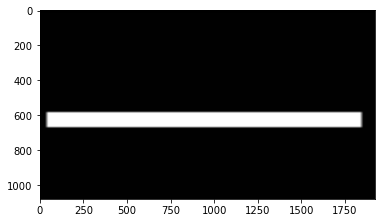

In [248]:
white=cv2.imread("./mask/white.jpg",cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/testMaskImg.jpg')
white_resize = cv2.resize(white, dsize=[1920,1080], fx=None, fy=None)
cv2.imwrite("./after/white_resize.jpg",white_resize)
im_out = cv2.bitwise_and(white_resize, im_mask)
cv2.imwrite('./mask/whitemask.jpg', im_out)
plt.imshow(im_out)

True

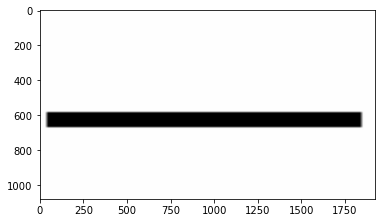

In [249]:
black=cv2.bitwise_not(im_out)
plt.imshow(black)
cv2.imwrite("./mask/blackmask.jpg",black)

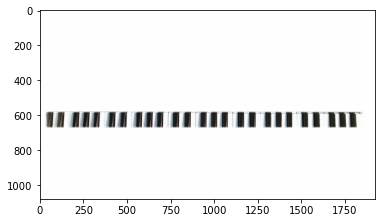

In [250]:
im_1 = cv2.imread('./imagefile/tryout/img_000.jpg', cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/blackmask.jpg')

im_out = cv2.bitwise_or(im_1, im_mask)
cv2.imwrite('./after/out.jpg', im_out)
plt.imshow(im_out)

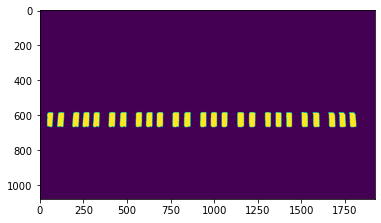

In [251]:
# 画像をグレースケールで読み出しオブジェクトimg_grayに代入
img_gray = cv2.cvtColor(im_out,cv2.COLOR_BGR2GRAY)
# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_gray,(9,9)) 

#閾値
threshold=120

# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite("./after/image0.jpg",img_binary) 
# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
plt.imshow(img_binary)

0 外接矩形の座標
[[1770  585]
 [1806  582]
 [1813  666]
 [1777  669]] 

1 外接矩形の座標
[[1711  585]
 [1748  582]
 [1753  667]
 [1717  669]] 

2 外接矩形の座標
[[1651  585]
 [1688  582]
 [1694  667]
 [1657  670]] 

3 外接矩形の座標
[[1562  585]
 [1599  583]
 [1602  667]
 [1565  668]] 

4 外接矩形の座標
[[1497  584]
 [1533  582]
 [1536  667]
 [1500  668]] 

5 外接矩形の座標
[[1411  668]
 [1411  584]
 [1443  584]
 [1443  668]] 

6 外接矩形の座標
[[1350  584]
 [1383  584]
 [1383  668]
 [1350  668]] 

7 外接矩形の座標
[[1289  667]
 [1289  583]
 [1322  583]
 [1322  667]] 

8 外接矩形の座標
[[1197  667]
 [1197  583]
 [1233  583]
 [1233  667]] 

9 外接矩形の座標
[[1131  584]
 [1168  584]
 [1168  668]
 [1131  668]] 

10 外接矩形の座標
[[1041  584]
 [1075  584]
 [1075  668]
 [1041  668]] 

11 外接矩形の座標
[[ 979  584]
 [1013  584]
 [1013  668]
 [ 979  668]] 

12 外接矩形の座標
[[917 667]
 [918 583]
 [953 584]
 [951 668]] 

13 外接矩形の座標
[[825 667]
 [826 583]
 [863 584]
 [861 668]] 

14 外接矩形の座標
[[759 583]
 [796 583]
 [796 667]
 [759 667]] 

15 外接矩形の座標
[[668 667]
 [669 583]
 [705 584]


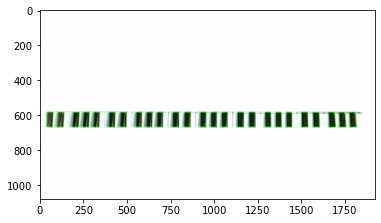

In [252]:
# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 1000, contours))


xleft=[]
xright=[]

ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/gaisetu"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    #print('回転角:')
    #print(rect[2])
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft +=[min(x)]
    xright+=[max(x)]

    ID+=1

In [253]:
print(xleft)

[1770, 1711, 1651, 1562, 1497, 1411, 1350, 1289, 1197, 1131, 1041, 979, 917, 825, 759, 668, 607, 547, 457, 392, 303, 243, 184, 97, 36]


In [254]:
print(xright)

[1813, 1753, 1694, 1602, 1536, 1443, 1383, 1322, 1233, 1168, 1075, 1013, 953, 863, 796, 705, 644, 584, 496, 431, 342, 283, 225, 138, 75]


In [255]:
def bubble_sort(arr):
    change = True
    while change:
        change = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                change = True
    return arr

In [256]:
xleft=bubble_sort(xleft)
xright=bubble_sort(xright)
print(xleft)
print(xright)

kokken=[[xleft[0],xright[0]]]
i=1
while i<len(xleft):
    kokken+=[[xleft[i],xright[i]]]
    i+=1


[36, 97, 184, 243, 303, 392, 457, 547, 607, 668, 759, 825, 917, 979, 1041, 1131, 1197, 1289, 1350, 1411, 1497, 1562, 1651, 1711, 1770]
[75, 138, 225, 283, 342, 431, 496, 584, 644, 705, 796, 863, 953, 1013, 1075, 1168, 1233, 1322, 1383, 1443, 1536, 1602, 1694, 1753, 1813]


In [257]:
i=0
base=white_resize

while i<len(xleft):
    cv2.rectangle(base,
              (xleft[i], 675),
              (xright[i], 490),
              (0, 0, 0),
              thickness=1,
              lineType=cv2.LINE_4,
              shift=0)

    i+=1


In [258]:
#端っこを追加
xright=[0]+xright
xleft =xleft+[1920]

In [259]:
#白い部分の座標
hakkenkari=[[xright[0],xleft[0]]]
i=1
while i<len(xleft):
    hakkenkari+=[[xright[i],xleft[i]]]
    i+=1
print(hakkenkari)

[[0, 36], [75, 97], [138, 184], [225, 243], [283, 303], [342, 392], [431, 457], [496, 547], [584, 607], [644, 668], [705, 759], [796, 825], [863, 917], [953, 979], [1013, 1041], [1075, 1131], [1168, 1197], [1233, 1289], [1322, 1350], [1383, 1411], [1443, 1497], [1536, 1562], [1602, 1651], [1694, 1711], [1753, 1770], [1813, 1920]]


In [260]:
mean=st.mean(xleft)-st.mean(xright)


In [261]:



#白鍵の正確な座標
i=0
j=0
hakken=[]
while i<len(hakkenkari):
    haklen=hakkenkari[i][1]-hakkenkari[i][0]
    if  haklen>mean:#別のところの値使いたい
        hakken+=[[hakkenkari[i][0],math.floor(hakkenkari[i][0]+haklen/2)]]+[[math.ceil(hakkenkari[i][0]+haklen/2),hakkenkari[i][1]]]
        
    else:
        hakken+=[[hakkenkari[i][0],hakkenkari[i][1]]]
    i+=1
print(hakken)

[[0, 36], [75, 97], [138, 161], [161, 184], [225, 243], [283, 303], [342, 367], [367, 392], [431, 457], [496, 521], [522, 547], [584, 607], [644, 668], [705, 732], [732, 759], [796, 825], [863, 890], [890, 917], [953, 979], [1013, 1041], [1075, 1103], [1103, 1131], [1168, 1197], [1233, 1261], [1261, 1289], [1322, 1350], [1383, 1411], [1443, 1470], [1470, 1497], [1536, 1562], [1602, 1626], [1627, 1651], [1694, 1711], [1753, 1770], [1813, 1866], [1867, 1920]]


In [262]:
print(hakken)

[[0, 36], [75, 97], [138, 161], [161, 184], [225, 243], [283, 303], [342, 367], [367, 392], [431, 457], [496, 521], [522, 547], [584, 607], [644, 668], [705, 732], [732, 759], [796, 825], [863, 890], [890, 917], [953, 979], [1013, 1041], [1075, 1103], [1103, 1131], [1168, 1197], [1233, 1261], [1261, 1289], [1322, 1350], [1383, 1411], [1443, 1470], [1470, 1497], [1536, 1562], [1602, 1626], [1627, 1651], [1694, 1711], [1753, 1770], [1813, 1866], [1867, 1920]]


In [263]:
print(kokken)

[[36, 75], [97, 138], [184, 225], [243, 283], [303, 342], [392, 431], [457, 496], [547, 584], [607, 644], [668, 705], [759, 796], [825, 863], [917, 953], [979, 1013], [1041, 1075], [1131, 1168], [1197, 1233], [1289, 1322], [1350, 1383], [1411, 1443], [1497, 1536], [1562, 1602], [1651, 1694], [1711, 1753], [1770, 1813]]


[[0, 36], [75, 97], [138, 161], [161, 184], [225, 243], [283, 303], [342, 367], [367, 392], [431, 457], [496, 521], [522, 547], [584, 607], [644, 668], [705, 732], [732, 759], [796, 825], [863, 890], [890, 917], [953, 979], [1013, 1041], [1075, 1103], [1103, 1131], [1168, 1197], [1233, 1261], [1261, 1289], [1322, 1350], [1383, 1411], [1443, 1470], [1470, 1497], [1536, 1562], [1602, 1626], [1627, 1651], [1694, 1711], [1753, 1770], [1813, 1866], [1867, 1920]]


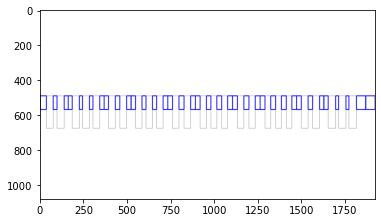

In [264]:

i=0
base=white_resize
while i<len(hakken):
    l=hakken[i][0]
    r=hakken[i][1]
    
    cv2.rectangle(base,
              (l,568),
              (r, 490),
              (0,0,255),
              thickness=3,
              lineType=cv2.LINE_4,
              shift=0)
    i+=1
cv2.imwrite("./after/hakken.jpg",base)
plt.imshow(base)
print(hakken)


In [265]:
#音の高さを検出
n=0 #右から何番目かを入力　左端は0 このプログラムだと0がシ
i=n

nanabit=[]
while i<7+n:
    print(hakken[i+1][0],hakken[i][1])
    if hakken[i+1][0]-hakken[i][1]>1:
        nanabit+=[0]
    else :
        nanabit+=[1]+[1]
        i+=1
    i+=1
if len(nanabit)>7:
    nanabit.pop(-1)
    nanabit[6]=0
print(nanabit)
i=6
tensin=0
k=1
while i>=0:
    tensin+=nanabit[i]*k
    k*=2
    i-=1

print(tensin)

75 36
138 97
161 161
283 243
342 303
367 367
[0, 0, 1, 1, 0, 0, 0]
24


In [266]:
if tensin==24:hstart=0
if tensin==51:hstart=1
if tensin==102:hstart=2
if tensin==12:hstart=3
if tensin==27:hstart=4
if tensin==54:hstart=5
if tensin==108:hstart=6
print(hstart)


0


In [267]:
#オクターブ
n=2

In [268]:
i=0
doremi=["C","D","E","F","G","A","B"]
hakkendoremi=[]
while i<len(hakken):
    hakkendoremi+=[str(doremi[(hstart+i)%7])+str(math.floor((hstart+i)/7)+n)]
    i+=1
print(hakkendoremi)

['C2', 'D2', 'E2', 'F2', 'G2', 'A2', 'B2', 'C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5', 'D5', 'E5', 'F5', 'G5', 'A5', 'B5', 'C6', 'D6', 'E6', 'F6', 'G6', 'A6', 'B6', 'C7']


True

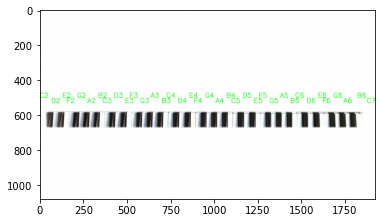

In [269]:
#base2 = cv2.imread("./after/white_resize.jpg")
#base2=im_out
base3=cv2.imread("./after/out.jpg")
plt.imshow(base3)
i=0
while i<len(hakken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(doremi[(hstart+i)%7])+str(math.floor((hstart+i)/7)+n)),
            org=(math.floor((hakken[i][1]+hakken[i][0])/2)-22,500+t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 255, 0),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

In [270]:
if hstart==0 or hstart==6:bstart=0
if hstart==1 :bstart=1
if hstart==2 or hstart==3:bstart=2
if hstart==4 : bstart=3
if hstart==5 : bstart=4
print(hstart,bstart)

0 0


In [271]:
sharp=["C#","D#","F#","G#","A#"]
if hstart==6:
    n+=1
i=0
kokkendoremi=[]
while i<len(kokken):
    kokkendoremi+=[str(sharp[(bstart+i)%5])+str(math.floor((bstart+i)/5)+n)]
    i+=1
print(kokkendoremi)

['C#2', 'D#2', 'F#2', 'G#2', 'A#2', 'C#3', 'D#3', 'F#3', 'G#3', 'A#3', 'C#4', 'D#4', 'F#4', 'G#4', 'A#4', 'C#5', 'D#5', 'F#5', 'G#5', 'A#5', 'C#6', 'D#6', 'F#6', 'G#6', 'A#6']


True

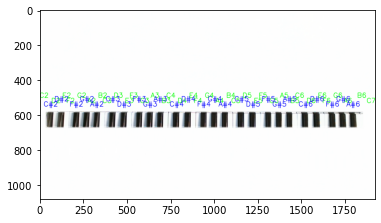

In [272]:
i=0
while i<len(kokken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(sharp[(bstart+i)%5])+str(math.floor((bstart+i)/5)+n)),
            org=(math.floor((kokken[i][1]+kokken[i][0])/2)-35,550-t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 0, 255),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

0 外接矩形の座標
[[1475  583]
 [1840  583]
 [1840  669]
 [1475  669]] 

1 外接矩形の座標
[[1408  583]
 [1445  583]
 [1445  669]
 [1408  669]] 

2 外接矩形の座標
[[1348  583]
 [1385  583]
 [1385  669]
 [1348  669]] 

3 外接矩形の座標
[[1288  583]
 [1323  582]
 [1325  668]
 [1290  669]] 

4 外接矩形の座標
[[1199  583]
 [1235  583]
 [1235  669]
 [1199  669]] 

5 外接矩形の座標
[[1132  583]
 [1169  583]
 [1169  669]
 [1132  669]] 

6 外接矩形の座標
[[1042  583]
 [1076  583]
 [1076  669]
 [1042  669]] 

7 外接矩形の座標
[[ 981  583]
 [1015  583]
 [1015  669]
 [ 981  669]] 

8 外接矩形の座標
[[918 668]
 [919 582]
 [954 583]
 [952 669]] 

9 外接矩形の座標
[[826 668]
 [828 582]
 [865 583]
 [863 669]] 

10 外接矩形の座標
[[759 668]
 [761 582]
 [799 583]
 [797 669]] 

11 外接矩形の座標
[[669 668]
 [672 582]
 [708 583]
 [705 669]] 

12 外接矩形の座標
[[608 668]
 [611 582]
 [647 583]
 [644 669]] 

13 外接矩形の座標
[[548 668]
 [551 581]
 [588 582]
 [585 670]] 

14 外接矩形の座標
[[457 669]
 [460 581]
 [501 583]
 [497 670]] 

15 外接矩形の座標
[[391 668]
 [396 580]
 [437 583]
 [431 671]] 

16 外接矩形の座標
[[302 6

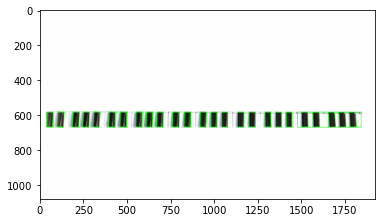

In [273]:
im_mask = cv2.cvtColor(im_mask, cv2.COLOR_BGR2GRAY)
img_1 = cv2.imread('./imagefile/tryout/img_000.jpg',1)
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_1_gray = cv2.bitwise_or(img_1_gray, im_mask)


# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_1_gray,(9,9)) 
threshold=130

img_blur = img_1_gray
cv2.imwrite("./after/image1.jpg",img_blur)



# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV) 

# img_grayを平均化領域9x9で平均化処理しimg_blurに代入

cv2.imwrite("./after/image2.jpg",img_binary)

# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 2000, contours))


xleft2=[]


ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/kagegai"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft2 +=[min(x)]
    
    ID+=1


In [274]:
#黒鍵検出のとき基準とする影の左端
print(xleft2)




[1475, 1408, 1348, 1288, 1199, 1132, 1042, 981, 918, 826, 759, 669, 608, 548, 457, 391, 302, 243, 184, 96, 38]


In [275]:
#比較やるよー

In [276]:
img_1 = cv2.imread('./imagefile/tryout/img_000.jpg',1)
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
print(img_1_gray.shape)
img_1 = cv2.bitwise_or(img_1_gray, im_mask)

(1080, 1920)


In [277]:
#01に変換
bothdoremi=hakkendoremi+kokkendoremi
#print(bothdoremi)
num=1
nijigen=[]
sasaki=[]


1
None
2
None
3
None
4
None
5
None
6
None
7
None
8
None
9
None
10
None
11
None
12
None
13
None
14
None
15
None
16
None
17
None
18
None
19
None
20
None
21
None
22
None
23
None
24
None
25
25 14 78
26
26 28 90
27
27 29 94
28
28 29 94
29
29 30 94
30
30 31 96
31
31 29 96
32
32 30 93
33
None
34
None
35
None
36
None
37
None
38
None
39
None
40
None
41
41 30 96
42
42 29 95
43
43 29 94
44
44 30 92
45
45 28 95
46
46 28 87
47
47 28 90
48
48 31 88
49
49 32 95
50
50 31 88
51
51 20 82
52
None
53
None
54
None
55
None
56
None
57
57 25 91
58
58 30 90
59
59 31 94
60
60 32 94
61
61 36 96
62
62 31 93
63
63 35 95
64
64 31 93
65
65 31 95
66
66 30 91
67
None
68
None
69
None
70
None
71
None
72
None
73
73 30 93
74
74 31 90
75
75 31 93
76
76 31 94
77
77 31 96
78
78 31 93
79
79 32 96
80
80 35 94
81
81 35 93
82
82 30 94
83
None
84
None
85
None
86
None
87
None
88
None
89
89 30 89
90
90 31 89
91
91 32 93
92
92 31 93
93
93 31 93
94
94 32 94
95
95 31 93
96
96 32 95
97
97 31 93
98
98 31 93
99
99 30 89
100
None
101
None

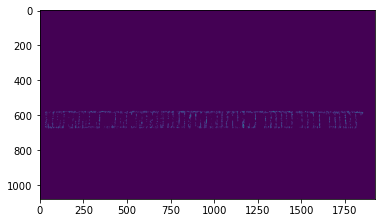

In [278]:
while(1):
    # ここから画像の比較
    img_number = num
    if img_number < 100:
        if img_number < 10:
            img_number = "0"+str(img_number)
        img_number = "0"+str(img_number)
    print(num)

# 比較したい画像を入力
    img_2_PATH = './imagefile/tryout/img_'+str(img_number)+'.jpg'
    img_2 = cv2.imread(img_2_PATH, 1)

    if img_2 is None:
        break

    img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
    # print(img_2_gray.shape)
    img_2 = cv2.bitwise_or(img_2_gray, im_mask)


# 画像を引き算
    img_diff = cv2.absdiff(img_1, img_2)

# 2値化
    ret2, img_th = cv2.threshold(img_diff, 10, 255, cv2.THRESH_BINARY)
    #閾値もともと20


    # アパーチャーサイズ 3, 5, or 7 など 1 より大きい奇数。数値が大きいほどぼかしが出る。
    ksize = 3
    # 中央値フィルタ
    img_mask = cv2.medianBlur(img_th, ksize)
    # 近傍の定義
    neiborhood = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],
                          np.uint8)

    # 収縮
    #img_mask = cv2.erode(img_th,neiborhood,iterations=6)
    # 膨張
    #img_mask = cv2.dilate(img_mask,neiborhood,iterations=6)

    # plt.imshow(img_mask)
    if num==35:
        cv2.imwrite("./after/sa.jpg", img_mask)


# 輪郭を検出
    contours, hierarchy = cv2.findContours(
        img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contours = list(filter(lambda x: cv2.contourArea(x) > 400, contours))
    if len(contours)==0:
        print("None")
    testarray = []
    output = []
    keyinfo = []

    # output=[]

      # 閾値以上の差分を四角で囲う
    for i, cnt in enumerate(contours):
        if width > 50 or height > 50:
            x, y, width, height = cv2.boundingRect(cnt)
            print(num,width,height)
            """cv2.rectangle(img_1, (x, y), (x+width, y+height),
                              (0, 0, 255), 1)"""
            # 黒鍵検出　元の影よりも重心のx座標が大きいか小さいか
            jyusin = math.floor(x + width / 2)
            # print(jyusin)
            i = 1
            numi = xleft2[i]
            numi1 = xleft2[i-1]

            while (numi-jyusin)*(numi-jyusin) < (numi1-jyusin)*(numi1-jyusin):
                    i = i+1
                    numi = xleft2[i]
                    numi1 = xleft2[i-1]
            if numi1 < jyusin:
                    # print("kokken")
                    kenshoku = 0

            else:
                    if numi1 >= jyusin:
                        # print("hakken")
                        kenshoku = 1

                    # else :
                        # print("nothing")
            testarray += [[jyusin, kenshoku]]
                # print("")

        # plt.imshow(img_1)
        # print(testarray)
    cx = []
    # cy=[]
    i = 0
    while i < len(testarray):
            #M = cv2.moments(cnt)
            #cx = int(M['m10']/M['m00'])
            #cy = int(M['m01']/M['m00'])
            cx += [testarray[i][0]]
            # cy += [500]#(仮)
            i += 1
    j = 0
    while j < len(cx):
            i = 0
            while hakken[i+1][0] < cx[j]:
                # print(hakkendoremi[i])
                i += 1
            score = str(doremi[(hstart+i) %7]+str(math.floor(i/7)+n))
            # print(score)
            # 白鍵と黒鍵の変更
            if testarray[j][1] == 1  or (doremi[(hstart+i)%7] == "E") or (doremi[(hstart+i)%7]=="B"):
                # print(score)
                keyinfo += [score]
            else:
                if testarray[j][1] == 0:
                    # print(score[:1] + '#' + score[1:])

                    # 黒鍵切り替え
                    # keyinfo+=[score[:1] + '#' + score[1:]]
                    keyinfo += [score]

            j += 1
        # print(keyinfo)

    i = 0
    while i < len(bothdoremi):
            if bothdoremi[i] in keyinfo:
                output += [1]
            else:
                output += [0]
            # print(bothdoremi[i],output[i])
            i += 1

        # print(output)
    nijigen += [output]
    sasaki += [keyinfo]
    num += 1


In [279]:
i=0
while i<len(nijigen):
    print(nijigen[i])
    i+=1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [280]:
i=0
while i<len(sasaki):
    print(sasaki[i])
    i+=1

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['C4']
['C4']
['C4']
['C4']
['C4']
['C4']
['C4']
['C4']
[]
[]
[]
[]
[]
[]
[]
[]
['C4']
['C4']
['C4']
['C4']
['C4']
['C4']
['C4']
['C4']
['C4']
['C4']
['C4']
[]
[]
[]
[]
[]
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
[]
[]
[]
[]
[]
[]
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
[]
[]
[]
[]
[]
[]
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
[]
[]
[]
[]
[]
[]
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
['A4']
[]
[]
[]
[]
[]
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
[]
[]
[]
[]
[]
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
['F4']
[]
[]
[]
[]
[]
[]
[]
['E4']
['E4']
['